<a href="https://colab.research.google.com/github/ElpoderdelComputo/SEI-Computo_aplicado/blob/main/RF_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


>> # COLEGIO DE POSTGRADUADOS

INSTITUCIÓN DE ENSEÑANZA E INVESTIGACIÓN EN CIENCIAS AGRÍCOLAS

>>>> CAMPUS MONTECILLO

POSGRADO EN SOCIOECONOMÍA, ESTADÍSTICA E INFORMÁTICA

>>>> **CÓMPUTO APLICADO**


# **Clasificador: Bosque aleatorio  E2021**

>**Autor:        José Rodríguez Rosales**

In [ ]:
# -*- coding: utf-8 -*-

# Importar las librerias a utilizar
import pandas as pd
# Abre archivo >>> Train_RF_2021.csv  cargando archivo desde disco
#df= pd.read_csv("/content/Train_RF_2021.csv", header=0)
# Abre archivo >>> Train_RF_2021.csv desde google drive
df= pd.read_csv("/content/drive/MyDrive/Datos_2002_2021/Train_2021.csv", header=0)

#Mostrar primeros 5 registros
df[:5]

In [ ]:
import numpy as np
# Valores de X: R,G,B,ExR,NGRDI
X = df.iloc[: , [2,3,4,5,10]].values
# y es la columna 12
y = df.iloc[: , 12].values

#imprime etiquetas de clases
print('Etiquetas de clase:', np.unique(y))
print(X[:5])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

## División de datos en 90% de entrenamiento y 10% de datos de prueba:
# random_state = 1
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.10,
                                                    stratify=y,
                                                    random_state=1)

# Mostrar cuantos datos hay en total: en entrenamiento y prueba
print('\nNumero de etiquetas en y:', np.bincount(y))
print('Numero de etiquetas en y_train:', np.bincount(y_train))
print('Numero de etiquetas en y_test:', np.bincount(y_test))

# Estandarizar los datos
stdsc = StandardScaler()

X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [ ]:
# una prueba rapida 
clf = RandomForestClassifier(criterion='gini', max_depth=10, n_estimators=100,
                       n_jobs=-1, random_state=1)

## Se entrena el modelo
clf.fit(X_train_std, y_train)
# score de entrenamiento 
pg2 = clf.score(X_train_std, y_train)

print('\nTrain Accuracy clf: %.5f' % pg2)

#Evaluando la prediccion con Xtest
y_pred = clf.predict(X_test_std)

print('Test Accuracy clf: %.5f' % clf.score(X_test_std, y_test))

In [ ]:
from sklearn.model_selection import GridSearchCV
# Búsqueda exhaustiva de hiperparámetros especificados para un estimador

# Número de árboles en el random forest (ne)
n_estimators = [50,100,120,150,200]

# El número de características a considerar al buscar la mejor división: (mc)
max_features = ['log2','sqrt','auto']

#criterio de impureza (cr)
criterion = ['gini','entropy'] 

# Número máximo de niveles en el árbol (mp)
max_depth = [8,10,11,12,13,14,15]

# Crear retícula
param_grid = [{'n_estimators': n_estimators,
               'criterion': criterion,
               'max_features': max_features,
               'max_depth': max_depth}]

# Crear el modelo base para ajustar
rf = RandomForestClassifier()

#busqueda exhaustiva con validacion cruzada k=10
gs = GridSearchCV(estimator=rf, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  refit=True,
                  cv=10,
                  n_jobs=-1)

# Sea justan los modelos
gs = gs.fit(X_train_std, y_train)

# Mejor score
print(gs.best_score_)
# Mejores parametros
print(gs.best_params_)

# El mejor estimador 
clf = gs.best_estimator_

0.9258365999884706
{'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'n_estimators': 50}


In [ ]:
# Evaluamos el mejor estumador con X_test_std y y_test
print('Test accuracy: %.5f' % clf.score(X_test_std, y_test))

Test accuracy: 0.92414


In [ ]:
# Validacion cruzada con k=10 del mejor modelo ajustado 

from sklearn.metrics import precision_score, recall_score, f1_score,accuracy_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_validate

# Metricas de evaluación con todos los datos 
scoring = {'prec_weighted': make_scorer(precision_score, average='macro'),
          'rec_weighted': make_scorer(recall_score, average='macro'),
          'f1_weighted': make_scorer(f1_score, average='macro'),
          'acc_weighted': make_scorer(accuracy_score)}


# Se utiliza mismo conjunto de datos
# División 90% de datos para entrenamiento, 10% de daatos para test
# random_state = 1 , k = 10
cvA = StratifiedShuffleSplit(n_splits=10, random_state=1)

# Se asignan las matrices de los datos de entrenamiento y prueba
crossVA = cvA.split(X_train_std, y_train)

# se inicia validacion
scores = cross_validate(estimator=clf,
                        X=X_train_std,y=y_train, 
                        scoring = scoring, 
                        return_estimator= True, 
                        cv = crossVA,
                        n_jobs=-1)

# Se imprimen los valores promedio y desviacion estandard de cada score
#print('CV scores: %s' % scores)
print('Accuracy: %.3f +/- %.3f' % (np.mean(scores['test_acc_weighted']),np.std(scores['test_acc_weighted'])))
print('F1 score: %.3f +/- %.3f' % (np.mean(scores['test_f1_weighted']),np.std(scores['test_f1_weighted'])))
print('Presicion: %.3f +/- %.3f' % (np.mean(scores['test_prec_weighted']),np.std(scores['test_prec_weighted'])))
print('Recall: %.3f +/- %.3f' % (np.mean(scores['test_rec_weighted']),np.std(scores['test_rec_weighted'])))
# se muestran los valores de cada score por cada particion
print("\n\t\tAccuracy\n")
print(scores['test_acc_weighted']) 
print("\n\t\t F1 \n")
print(scores['test_f1_weighted'])
print("\n\t\t Prec \n")
print(scores['test_prec_weighted'])
print("\n\t\t Rec \n")
print(scores['test_rec_weighted'])

Accuracy: 0.924 +/- 0.005
F1 score: 0.911 +/- 0.005
Presicion: 0.919 +/- 0.006
Recall: 0.906 +/- 0.004

		Accuracy

[0.92552026 0.92442497 0.93099671 0.92661555 0.9211391  0.92552026
 0.91456736 0.9211391  0.93099671 0.9211391 ]

		 F1 

[0.91017295 0.91065522 0.91705116 0.91233462 0.90603366 0.91232406
 0.90166116 0.90936025 0.9178617  0.90772503]

		 Prec 

[0.92129205 0.91743696 0.92782616 0.92431884 0.91648554 0.92132757
 0.91010091 0.9123445  0.92562706 0.91244426]

		 Rec 

[0.90453798 0.90665759 0.91217367 0.90684789 0.90131885 0.90860989
 0.89775243 0.90721054 0.91387074 0.9053019 ]


In [ ]:
# Guardando el mejor modelo
import joblib
joblib.dump(clf, "./RF_SelCa_2021.pkl")

['./RF_SelCa_2021.pkl']

In [ ]:
# Mostrar Metricas por cada particion
ACC = scores['test_acc_weighted']
F1 = scores['test_f1_weighted']
PREC = scores['test_prec_weighted']
REC = scores['test_rec_weighted']

print('CV, Part, acc,  F1,   prec,   Rec')
for i in range(10):
  print('CV:',i+1  , '%.5f' % ACC[i], '%.5f' % F1[i],'%.5f' %  PREC[i],'%.5f' % REC[i])

CV, Part, acc,  F1,   prec,   Rec
CV: 1 0.92552 0.91017 0.92129 0.90454
CV: 2 0.92442 0.91066 0.91744 0.90666
CV: 3 0.93100 0.91705 0.92783 0.91217
CV: 4 0.92662 0.91233 0.92432 0.90685
CV: 5 0.92114 0.90603 0.91649 0.90132
CV: 6 0.92552 0.91232 0.92133 0.90861
CV: 7 0.91457 0.90166 0.91010 0.89775
CV: 8 0.92114 0.90936 0.91234 0.90721
CV: 9 0.93100 0.91786 0.92563 0.91387
CV: 10 0.92114 0.90773 0.91244 0.90530


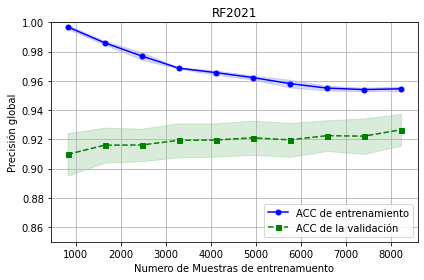

In [ ]:
import matplotlib.pyplot as plt
import matplotlib
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import learning_curve

# Mostrar curvas de aprendizaje
# validacion cruzada k = 10
# Creamos tuberia COn el mejor modelo

train_sizes, train_scores, test_scores = learning_curve(estimator=clf,
                               X=X_train_std,
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=10,
                               n_jobs=-1)

# Calculos de media y desviacion estandard
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Trazo de acc de entrenamiento
plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='ACC de entrenamiento')

# Trazo de media y desviacion estandard de etrenamiento
plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

# Trazo de acc de validación en verde
plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='ACC de la validación')

# Trazo de media y desviacion estandard de la validacion
plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.title('RF2021')
plt.xlabel('Numero de Muestras de entrenamuento')
plt.ylabel('Precisión global')
plt.legend(loc='lower right')
plt.ylim([0.85, 1.0])
plt.tight_layout()
# plt.savefig('images/06_05.png', dpi=300)
plt.show()

[Text(0, 0.5, 'Clases verdaderas'),
 Text(0.5, 0, 'Clases predichas'),
 Text(0.5, 1.0, 'RF2021')]

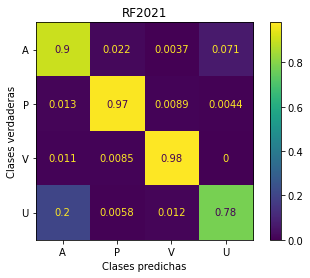

In [ ]:
# Matriz de confusion normalizada
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Predecir las etiquetas de X_test_std
y_pred = clf.predict(X_test_std)
cm = confusion_matrix(y_test, y_pred, normalize='true')

# Prepara la matriz y agrega etiquetas
cm_display = ConfusionMatrixDisplay(cm, display_labels=['A','P','V','U'])
cm_display.plot()
# Agrega titulos y ejes y mostrar
cm_display.ax_.set(title='RF2021', xlabel='Clases predichas', ylabel='Clases verdaderas')

In [ ]:
# Mostrar metricas por clase
from sklearn.metrics import precision_recall_fscore_support as score

# Calcular los valores de la metricas
precision, recall, fscore, support = score(y_test, y_pred)

# Mostrar metricas
print('Precision: {}'.format(precision))
print('Recall: {}'.format(recall))
print('F1score: {}'.format(fscore))
# Valores calculados on numero de muestras
#print('Support: {}'.format(support))

Precision: [0.85159011 0.95633188 0.98567335 0.87012987]
Recall: [0.90262172 0.97333333 0.98005698 0.77906977]
F1score: [0.87636364 0.96475771 0.98285714 0.82208589]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


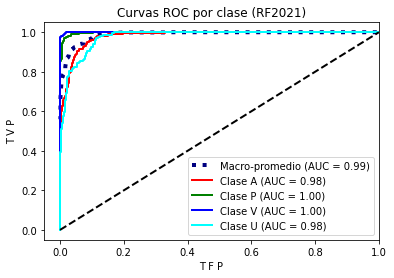

In [ ]:
# Curvas ROC AUC
# ...................................................

# Bibliotecas necesarias
from itertools import cycle
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

n_classes = 4

# Predecir cada clase contra las otras
y_score = clf.fit(X_train_std, y_train).predict_proba(X_test_std)

# Calcule la ROC de cada categoría
fpr = dict()
tpr = dict()
roc_auc = dict()

# Calcule la curva ROC macro-promedio y el área ROC 
y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Agregue todas las tasas de falsos positivos
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Interpolar todas las curvas ROC en estos puntos
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Promediar y calcular el AUC macro
mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Trazar todas las curvas
lw=2
plt.figure()

plt.plot(fpr["macro"], tpr["macro"],
         label='Macro-promedio (AUC = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

# Paleta de colores
colors = cycle(['red', 'green', 'blue', 'cyan'])

# Etiqueta de clases
clases = ['A','P','V','U']

# Trazo de las curvas por clase y agregar etiqueta de area AUC
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='Clase {0} (AUC = {1:0.2f})'
             ''.format(clases[i], roc_auc[i]))

# Trazo de la diagonal punteada
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])

# Etiquetas de los ejes y titulos
plt.xlabel('T F P')
plt.ylabel('T V P')
plt.title('Curvas ROC por clase (RF2021)')
plt.legend(loc="lower right")

# Tazar
plt.show()

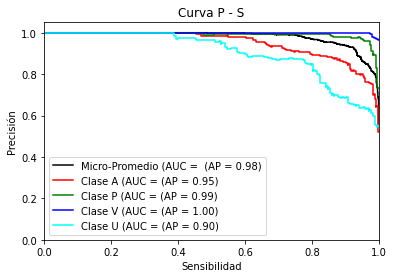

In [ ]:
# Curvas P-S AUC 
# ...................................................
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import PrecisionRecallDisplay

# Diccionarios para cada clase: P, S y promedio
precision = dict()
recall = dict()
average_precision = dict()

# Calcule los valores de P  y S
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test_dummies[:, i], y_score[:, i])
    average_precision[i] = average_precision_score(y_test_dummies[:, i], y_score[:, i])

# Calcular micro-promedio: cuantificación de la puntuación en todas las clases conjuntamente
precision["micro"], recall["micro"], _ = precision_recall_curve( y_test_dummies.ravel(), y_score.ravel())
average_precision["micro"] = average_precision_score(y_test_dummies, y_score, average="micro")

# Paleta de colores
colors = cycle(['red', 'green', 'blue', 'cyan', "teal"])

_, ax = plt.subplots(figsize=(6, 4))

# Crear la figura
display = PrecisionRecallDisplay(
    recall=recall["micro"],
    precision=precision["micro"],
    average_precision=average_precision["micro"],
)
display.plot(ax=ax, name="Micro-Promedio (AUC = ", color="K")

# Trazar cada curva por clase y etiquetas
for i, color in zip(range(n_classes), colors):
    display = PrecisionRecallDisplay(
        recall=recall[i],
        precision=precision[i],
        average_precision=average_precision[i],
    )
    display.plot(ax=ax, name=f"Clase {clases[i]} (AUC =", color=color)

# Configurar ejes
handles, labels = display.ax_.get_legend_handles_labels()
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])

# Ubicar leyenda y titulo de la figura
ax.legend(handles=handles, labels=labels, loc="best")
ax.set_title("Curva P - S")
plt.xlabel('Sensibilidad')
plt.ylabel('Precisión')
# Trazar
plt.show()

In [ ]:
# Leer archivo con rgb e indices para predecir 
# X: R,G,B,ExR,NGRDI
#df= pd.read_csv("Huehuetla_todo_2021.csv",header=None) #base original
df= pd.read_csv("/content/drive/MyDrive/Datos_2002_2021/Huehuetla_todo_2021.csv",header=None) #base original

df.head()

,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0.0,0.0,18.78745,0.0,0.0,0.0
1,0,0,0,0,0.0,0.0,18.78745,0.0,0.0,0.0
2,0,0,0,0,0.0,0.0,18.78745,0.0,0.0,0.0
3,0,0,0,0,0.0,0.0,18.78745,0.0,0.0,0.0
4,0,0,0,0,0.0,0.0,18.78745,0.0,0.0,0.0


In [ ]:
#Verificar tamaño de datos
X = df.iloc[: , [0,1,2,4,8]].values
np.size(X)/5

424593.0

In [ ]:
# Predecir con el modelo ajustado
print('Leyedo archivo')

# Estandarizar datos
X_PRED_STD = stdsc.transform(X)

# Mostrar primeros registros de datos
print(X_PRED_STD[0:5])

# Predecir
y_pred = clf.predict(X_PRED_STD)

# Mostrar primeros registros de prediccion
print('\nListo!')

print(y_pred[0:10])

# Mostrar numero de clases
print('\nClases: 1 2 3 4 5')
 
# Cuantificar numero de muestras predichas por clase
print('CLasificacion:', np.bincount(y_pred))

print('\nFIN DE LA PREDICCION')

Leyedo archivo
[[-1.9065813  -2.40466009 -2.48006195 -1.50436839 -0.87564951]
 [-1.9065813  -2.40466009 -2.48006195 -1.50436839 -0.87564951]
 [-1.9065813  -2.40466009 -2.48006195 -1.50436839 -0.87564951]
 [-1.9065813  -2.40466009 -2.48006195 -1.50436839 -0.87564951]
 [-1.9065813  -2.40466009 -2.48006195 -1.50436839 -0.87564951]]

Listo!
[3 3 3 3 3 3 3 3 3 3]

Clases: 1 2 3 4 5
CLasificacion: [     0  11911  35296 363218  14168]

FIN DE LA PREDICCION


In [ ]:
# Agregamos a RGB el valor de su clase segun lo predicho
j=0
nuevo=[]
for i in X:
  nuevo.append([i[0],i[1],i[2], y_pred[j]])
  j+=1

# Reemplazamos la posicion 3 como 0 si el valor de R G Y B ES CERO
for i in nuevo:
  if i[0]==i[1]==i[2]==0:
    i[3]=0

#Agregamos un color a cada clase sustituyendo los valores RGB Segun sea el caso
for i in nuevo:
  if i[3]==1: # MAGENTA
    i[0]=255
    i[1]=0
    i[2]=255
  elif i[3]==2: # AMARILLO
    i[0]=255
    i[1]=255
    i[2]=0
  elif i[3]==3: # VERDE
    i[0]=6
    i[1]=137
    i[2]=2
  elif i[3]==4: # ROJO
    i[0]=255
    i[1]=0
    i[2]=0
  elif i[3]==0: # BLANCO 
    i[0]=255
    i[1]=255
    i[2]=255

# Eliminamos la cuarta columna para teer solo los 3 RGB
lista=[]
for i in nuevo:
  lista.append([i[0], i[1], i[2]])

In [ ]:
#Convertir lista a un arreglo 
arr = np.array(lista)
# Tamaño de la imagen original
ban = 3 # numero de bandas
m = 741 # ancho
n = 573 # alto
tamanio = m*n*ban #

# Mostrar tamaño de la lista y de la imagen deseada
print(tamanio)
print(m,n,ban)

# Convertir matriz de 1 dimension a 3
matriz = arr.reshape(n,m,3)
print(matriz.shape)

1273779
741 573 3
(573, 741, 3)


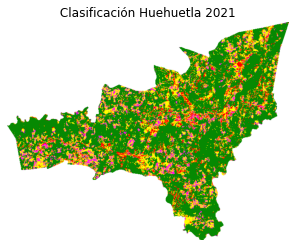

In [ ]:
# Crear imagen a partir de una matriz

from PIL import Image
from matplotlib import cm
import matplotlib.pyplot as plt

# Conveetir tipo de datos de una matriz a 'uint8'
img = np.array(matriz).astype('uint8')

# Crea imagen desde un arreglo
Huehue_img = Image.fromarray(img)

# Mostrar la imagen
Huehue_img.show()

# Agregarle etiquetas y mostrar la imagen
plt.imshow(Huehue_img)
plt.title(' Clasificación Huehuetla 2021 ') 
plt.axis('off')
plt.show()

In [ ]:
# Guardar la imagen generada
plt.imsave("CLF2021_SelCa.jpg",img)

In [ ]:
# Cuantificar numero de pixeles por clase
q,w,e,r,t = 0,0,0,0,0
for i in nuevo:
  if i[3]== 0:
    q+=1
  elif i[3]== 1:
    w+=1
  elif i[3]== 2:
    e+=1
  elif i[3]== 3:
    r+=1
  elif i[3]== 4:
    t+=1

#  Area por pixel
res = 15*15 #m2
# Crear una lista
tabla = [q,w,e,r,t]

In [ ]:
# Mostrar areas por clase en hectareas Totales
areas = tabla[1:]
area = 0
c = 1

print('Areas por clase\n')
for i in areas:
  h = i*res/10000
  print('Clase ', c, '=','%.2f' % h, 'ha')
  area = area+i*res/10000
  c += 1

print('\nHectáreas = ', '%.2f' % area, 'ha')

Areas por clase

Clase  1 = 268.00 ha
Clase  2 = 794.16 ha
Clase  3 = 2570.78 ha
Clase  4 = 318.78 ha

Hectáreas =  3951.72 ha
